Data của bài này mình mượn từ [nguồn này](https://github.com/animesh-agarwal/Machine-Learning/tree/master/LogisticRegression/data)

In [117]:
#https://github.com/bangoc123/learn-machine-learning-in-two-months/tree/master/models/logistic-regression

In [72]:
import numpy as np

In [73]:
import matplotlib.pyplot as plt

In [74]:
import pandas as pd

#### Dùng pandas để hiển thị data

Ta quy định trước
- Những điểm có nhãn là 0 nghĩa là sẽ có màu đỏ
- Những điểm có nhãn là 1 nghĩa là sẽ có màu xanh

In [75]:
data = pd.read_csv("./marks.txt")

In [76]:
x_to_display = data.iloc[:, :-1]

#### Lấy nhãn ra khỏi data

In [77]:
y_to_display = data.iloc[:, -1]

In [78]:
reds = data.loc[y_to_display == 0] # Reds: 0

#### Lấy dữ liệu có màu xanh nhãn là 1

In [79]:
blues = data.loc[y_to_display == 1] # Blues: 1

#### Lấy dữ liệu màu đỏ có nhãn là 0

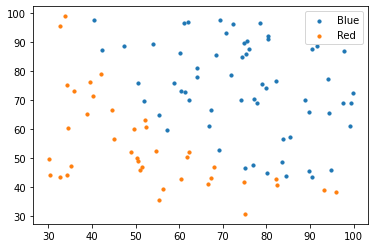

In [80]:
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], s=10, label='Blue')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], s=10, label='Red')
plt.legend()
plt.show()

**Sử dụng numpy để tách dữ liệu**

In [81]:
from numpy import genfromtxt
my_data = genfromtxt('./marks.txt', delimiter=',')

X, y = my_data[:, :-1], my_data[:, -1]

X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
y = np.reshape(y, (y.shape[0], 1))

**Chú ý:** Chia data thành 2 bộ: một bộ dành cho train và một bộ dành để test độ chính xác sau khi train. Thực tế sẽ có thêm một bộ validation test để kiểm soát độ chính xác của mô hình trong khi train nhưng để đơn giản dễ hiểu hơn ở bài này tôi chỉ dùng duy nhất 2 bộ là train và test.

In [82]:
# 95 điểm dữ liệu dành để train
train_x = X[:95] # Shape(95, 3)
train_y = y[:95] # Shape(95, 1)

In [83]:
# 5 điểm dữ liệu dành cho test
test_x = X[95:] # Shape(5, 3)
test_y = y[95:] # Shape(5, 1)

In [95]:
# Chuẩn hoá dữ liệu
# Quá trình này làm hài hoà mức độ ảnh hưởng của các biến với đầu ta. Ta sẽ nói kỹ về quá trình này trong các bài sau.
def normalize_data(train_x, test_x):
    train_mean = np.mean(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    train_std = np.std(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    
    train_x = (train_x-train_mean)/train_std
    test_x = (test_x-train_mean)/train_std
    return train_x, test_x

In [96]:
train_x, test_x = normalize_data(train_x, test_x)

**Mục tiêu:** Ta phải tìm đường có thể phân cách 2 vùng dữ liệu màu xanh và màu đỏ

# Hàm Sigmoid

In [97]:
def sigmoid(z):
    """
    Parameters
    z shape: (95, 1)
    Returns
    output shape: (95, 1)
    """
    return 1 / (1 + np.exp(-z))

# Tìm z

<img src="https://camo.githubusercontent.com/070fae25c3784621470c279cabe7c08d4662f6f5/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f7376672e6c617465783f5c696e6c696e652673706163653b5c6c617267652673706163653b7a2673706163653b3d2673706163653b5c74686574615e5478" />

In [101]:
# z = np.dot(x, theta)

# Tìm Htheta

<img src="https://camo.githubusercontent.com/83c5dcf289d3defb7f56c9c5bb931eb132ddd56b/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f7376672e6c617465783f5c696e6c696e652673706163653b5c6c617267652673706163653b685f7b5c74686574617d2878292673706163653b3d2673706163653b5c667261637b317d7b312673706163653b2b2673706163653b655e7b2d7a7d7d2673706163653b3d2673706163653b5c667261637b317d7b312673706163653b2b2673706163653b655e7b2d7b5c74686574617d5e54787d7d" />

In [102]:
# sigmoid(z)

# Hàm Loss

<img src="https://camo.githubusercontent.com/388a83884ff869439d8527ee738f903ec9bb1ea2/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f7376672e6c617465783f5c736d616c6c2673706163653b4a285c7468657461292673706163653b3d2673706163653b5c2673706163653b5c667261637b2d317d7b6d7d2673706163653b5c73756d5f7b697d5e7b6d7d2673706163653b795f692673706163653b6c6f6728685f5c746865746128785f6929292673706163653b2b2673706163653b28312d795f69296c6f6728312d685f5c746865746128785f692929" />

In [104]:
def loss(x, y, theta):
    """
    Parameters
    ----------
    x shape: (95, 3)
    y shape: (95, 1)
    theta shape: (3, 1)
    Returns
    ----------
    loss: float
    """
    z = np.dot(x, theta)
    loss = -(y*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z)))
    return np.mean(loss)

# Đạo Hàm của Hàm Loss

<img src="https://camo.githubusercontent.com/ae66383a1f3c6c5f71a6f4164326e5eff4c26ff4/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f7376672e6c617465783f5c667261637b5c7061727469616c2673706163653b4a285c7468657461297d7b5c7061727469616c2673706163653b5c74686574615f697d2673706163653b3d2673706163653b5c667261637b317d7b6d7d2673706163653b5c73756d5f7b693d317d5e7b6d7d28685f5c746865746128785e69292673706163653b2d2673706163653b795e6929785f6a5e69" />

In [106]:
def dJtheta(x, y, theta):
    """
    Parameters
    ----------
    x shape: (95, 3)
    y shape: (95, 1)
    theta shape: (3, 1)
    Returns
    ----------
    grad shape: (3, 1)
    """
    z = np.dot(x, theta)
    dJtheta = np.mean(x*(sigmoid(z)-y), axis=0)
    return dJtheta.reshape((dJtheta.shape[0], 1))

# Gradient descent

<img src="https://camo.githubusercontent.com/818b5bd919e070ccbba779390664cf8915fe1a71/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f7376672e6c617465783f5c696e6c696e652673706163653b5c6c617267652673706163653b5c74686574615f312673706163653b3d2673706163653b5c74686574615f302673706163653b2d2673706163653b5c616c7068612673706163653b5c626967747269616e676c65646f776e2673706163653b4a285c74686574615f3029" />

In [107]:
theta_new = np.zeros((X.shape[1], 1))

In [108]:
theta_new

array([[0.],
       [0.],
       [0.]])

**Chú ý:** Một số hyperparameters luôn cần có đó là số lượt train và tốc độc học

In [109]:
num_epoches = 10000
for i in range(num_epoches):
    theta_new = theta_new - learning_rate*dJtheta(train_x, train_y, theta_new)
    print(loss(train_x, train_y, theta_new))
    print ("loss {}, m {}, b {} iteration {}".format(loss(train_x, train_y, theta_new),theta_new[0],theta_new[1], i))

0.6842137368800885
loss 0.6842137368800885, m [0.02133323], b [0.01897977] iteration 0
0.6760742007522039
loss 0.6760742007522039, m [0.04190817], b [0.03721461] iteration 1
0.6686344169852559
loss 0.6686344169852559, m [0.0617699], b [0.05475012] iteration 2
0.6618111896309159
loss 0.6618111896309159, m [0.0809614], b [0.07162967] iteration 3
0.6555312088901687
loss 0.6555312088901687, m [0.09952335], b [0.08789432] iteration 4
0.6497300151665769
loss 0.6497300151665769, m [0.11749417], b [0.1035828] iteration 5
0.644351023306998
loss 0.644351023306998, m [0.13491001], b [0.11873152] iteration 6
0.6393446202673001
loss 0.6393446202673001, m [0.15180477], b [0.13337463] iteration 7
0.6346673422995249
loss 0.6346673422995249, m [0.16821021], b [0.14754407] iteration 8
0.6302811327585938
loss 0.6302811327585938, m [0.184156], b [0.1612697] iteration 9
0.6261526782882172
loss 0.6261526782882172, m [0.19966986], b [0.17457938] iteration 10
0.6222528190514264
loss 0.6222528190514264, m [0.2

<img src="https://miro.medium.com/max/1600/1*PkEl-8DBQa-xEft_tacXLQ.gif" />

Hình ảnh chỉ mang tính chất minh hoạ vì mình chưa có đủ thời gian làm animation :D. Nhưng quá trình training của chúng ta sẽ tương tự như vậy

In [93]:
X.shape

(100, 3)

In [110]:
theta_new

array([[6.55693257],
       [6.23111232],
       [5.3590858 ]])

#### Tiến hành dự đoán

Ta cho output của hàm sigmoid ra lớn hơn hoặc bằng 0.5 sẽ là nhãn 1 và nhỏ hơn 0.5 sẽ là nhãn 0

In [111]:
z_predicted = np.dot(test_x,theta_new)

In [112]:
predicted_classes = (sigmoid(z_predicted) >= 0.5).astype(int)

In [113]:
predicted_classes

array([[1],
       [1],
       [1],
       [0],
       [1]])

Vậy là khả năng dự đoán những dự liệu mới của chúng ta là:

In [114]:
accuracy = (predicted_classes == test_y) * 100

In [115]:
accuracy_mean = np.mean(accuracy)

In [116]:
accuracy_mean

80.0

#### Biểu diễn đường thẳng phân cách

<img src="https://camo.githubusercontent.com/070fae25c3784621470c279cabe7c08d4662f6f5/68747470733a2f2f6c617465782e636f6465636f67732e636f6d2f7376672e6c617465783f5c696e6c696e652673706163653b5c6c617267652673706163653b7a2673706163653b3d2673706163653b5c74686574615e5478" />

Chú ý z chính là đường thẳng phân loại data của chúng ta

<img src="https://miro.medium.com/max/1280/1*bcWJyX3iAIr0MGNIxUnQxg.png" />

Link ảnh từ [đây](https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24)